In [122]:
# Importing packages
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import plotly.express as px

In [123]:
# Creating a dataframe from the given csv file
data = pd.read_csv('NY_LEHD_WAC_2021_ZIP')
df_total = pd.DataFrame(data)

In [124]:
# Exploring the data
df_total

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
0,360010001001003,2,0,2,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,20231016
1,360010001001004,51,6,41,4,3,3,45,0,0,...,0,0,0,0,0,0,0,0,0,20231016
2,360010001001005,33,6,16,11,1,4,28,0,0,...,0,0,0,0,0,0,0,0,0,20231016
3,360010001001006,38,7,24,7,6,5,27,0,0,...,0,0,0,0,0,0,0,0,0,20231016
4,360010001001007,127,13,77,37,15,23,89,0,0,...,0,0,0,0,0,0,0,0,0,20231016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104515,361231505022052,19,7,7,5,6,9,4,0,0,...,0,0,0,0,0,0,0,0,0,20231016
104516,361231505022054,14,4,7,3,7,7,0,0,0,...,0,0,0,0,0,0,0,0,0,20231016
104517,361231505022059,2,0,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,20231016
104518,361231505022062,5,2,3,0,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,20231016


In [125]:
# creating a new dataframe of total jobs and jobs with an NAICS sector code
df_industry = df_total[["w_geocode", # Workplace Census Block Code
                        "C000", # Total jobs
                        "CNS01", # Number of jobs in NAICS sector 11 (Agriculture, Forestry, Fishing and Hunting)
                        "CNS02", # Number of jobs in NAICS sector 21 (Mining, Quarrying, and Oil and Gas Extraction)
                        "CNS03", # Number of jobs in NAICS sector 22 (Utilities)
                        "CNS04", # Number of jobs in NAICS sector 23 (Construction)
                        "CNS05", # Number of jobs in NAICS sector 31-33 (Manufacturing)
                        "CNS06", # Number of jobs in NAICS sector 42 (Wholesale Trade)
                        "CNS07", # Number of jobs in NAICS sector 44-45 (Retail Trade)
                        "CNS08", # Number of jobs in NAICS sector 48-49 (Transportation and Warehousing)
                        "CNS09", # Number of jobs in NAICS sector 51 (Information)
                        "CNS10", # Number of jobs in NAICS sector 52 (Finance and Insurance)
                        "CNS11", # Number of jobs in NAICS sector 53 (Real Estate and Rental and Leasing)
                        "CNS12", # Number of jobs in NAICS sector 54 (Professional, Scientific, and Technical Services)
                        "CNS13", # Number of jobs in NAICS sector 55 (Management of Companies and Enterprises)
                        "CNS14", # Number of jobs in NAICS sector 56 (Administrative and Support and Waste Management and Remediation Services)
                        "CNS15", # Number of jobs in NAICS sector 61 (Educational Services)
                        "CNS16", # Number of jobs in NAICS sector 62 (Health Care and Social Assistance)
                        "CNS17", # Number of jobs in NAICS sector 71 (Arts, Entertainment, and Recreation)
                        "CNS18", # Number of jobs in NAICS sector 72 (Accommodation and Food Services)
                        "CNS19", # Number of jobs in NAICS sector 81 (Other Services [except Public Administration])
                        "CNS20" # Number of jobs in NAICS sector 92 (Public Administration)
                        ]]

In [126]:
# Checking that the dataframe contains the selected columns
df_industry.columns

Index(['w_geocode', 'C000', 'CNS01', 'CNS02', 'CNS03', 'CNS04', 'CNS05',
       'CNS06', 'CNS07', 'CNS08', 'CNS09', 'CNS10', 'CNS11', 'CNS12', 'CNS13',
       'CNS14', 'CNS15', 'CNS16', 'CNS17', 'CNS18', 'CNS19', 'CNS20'],
      dtype='object')

In [127]:
# Creating a multi-variable dictionary that convert WAC codes to NAICS Sector codes, Title, and DCP Macro Sector definitions

wac_to_naics_dcp_code = {'CNS01':['11', 'Agriculture, Forestry, Fishing and Hunting', 'Industrial'],
                     'CNS02':['21', 'Mining, Quarrying, and Oil and Gas Extraction', 'Industrial'],
                     'CNS03':['22', 'Utilities', 'Industrial'],
                     'CNS04':['23', 'Construction', 'Industrial'],
                     'CNS05':['31-33', 'Manufacturing', 'Industrial'],
                     'CNS06':['42', 'Wholesale Trade', 'Industrial'],
                     'CNS07':['44-45', 'Retail Trade', 'Local Services'],
                     'CNS08':['48-49', 'Transportation and Warehousing', 'Industrial'],
                     'CNS09':['51', 'Information', 'Office'],
                     'CNS10':['52', 'Finance and Insurance', 'Office'],
                     'CNS11':['53', 'Real Estate and Rental and Leasing', 'Office'],
                     'CNS12':['54', 'Professional, Scientific, and Technical Services', 'Office'],
                     'CNS13':['55', 'Management of Companies and Enterprises', 'Office'],
                     'CNS14':['56', 'Administrative and Support and Waste Management and Remediation Services', 'Office'],
                     'CNS15':['61', 'Educational Services', 'Institutional'],
                     'CNS16':['62', 'Health Care and Social Assistance', 'Institutional'],
                     'CNS17':['71', 'Arts, Entertainment, and Recreation', 'Local Services'],
                     'CNS18':['72', 'Accommodation and Food Services', 'Local Services'],
                     'CNS19':['81', 'Other Services [except Public Administration]', 'Local Services'],
                     'CNS20':['92', 'Public Administration', 'Public Administration']
                     }

In [128]:
# Reading in the two shapefiles - Census Blocks and NYC Community Districts. 
census_blocks_2020 = gpd.read_file("NYC_Census_Blocks_2020/NYC_Census_Blocks_2020.shp")
nyc_cd_2020 = gpd.read_file("NYC_Community_Districts_2020/NYC_Community_Districts_2020.shp")

In [129]:
# Exploring the GeoDataframe structure.
census_blocks_2020
# [GEOID] from "census_blocks_20202" and [w_geocode] from the "df_industry" variable appear to be a common identifier.
# This will be used later when I join the two dataframes.

,CB2020,BoroCode,BoroName,CT2020,BCTCB2020,GEOID,geometry
0,1000,1,Manhattan,000100,10001001000,360610001001000,"POLYGON ((973172.666 194632.348, 973310.630 19..."
1,1001,1,Manhattan,000100,10001001001,360610001001001,"POLYGON ((972081.788 190733.467, 972184.766 19..."
2,1000,1,Manhattan,000201,10002011000,360610002011000,"POLYGON ((988376.731 199328.618, 987837.811 19..."
3,1001,1,Manhattan,000201,10002011001,360610002011001,"POLYGON ((988392.400 199070.298, 988285.301 19..."
4,2000,1,Manhattan,000201,10002012000,360610002012000,"POLYGON ((988422.186 198807.188, 988449.289 19..."
...,...,...,...,...,...,...,...
37584,2008,4,Queens,014202,40142022008,360810142022008,"POLYGON ((1035736.247 193578.383, 1034357.024 ..."
37585,2001,3,Brooklyn,035000,30350002001,360470350002001,"POLYGON ((989907.478 149120.748, 989754.444 14..."
37586,2002,3,Brooklyn,035000,30350002002,360470350002002,"POLYGON ((989907.478 149120.748, 989906.393 14..."
37587,2007,4,Queens,014202,40142022007,360810142022007,"POLYGON ((1035826.536 193360.221, 1035708.032 ..."


In [130]:
# Renaming 'w_geocode' to 'GEOID' in the dataframe 'df_industry' to avoid conflicts
df_industry = df_industry.rename(columns={'w_geocode':'GEOID'})

In [258]:
# Performing the same action on the original dataframe 'df_total' for later use
df_total = df_total.rename(columns={'w_geocode':'GEOID'})

In [131]:
# Checking data types
df_industry.dtypes

GEOID    int64
C000     int64
CNS01    int64
CNS02    int64
CNS03    int64
CNS04    int64
CNS05    int64
CNS06    int64
CNS07    int64
CNS08    int64
CNS09    int64
CNS10    int64
CNS11    int64
CNS12    int64
CNS13    int64
CNS14    int64
CNS15    int64
CNS16    int64
CNS17    int64
CNS18    int64
CNS19    int64
CNS20    int64
dtype: object

In [133]:
#checking datatypes
df_total.dtypes

GEOID         int64
C000          int64
CA01          int64
CA02          int64
CA03          int64
CE01          int64
CE02          int64
CE03          int64
CNS01         int64
CNS02         int64
CNS03         int64
CNS04         int64
CNS05         int64
CNS06         int64
CNS07         int64
CNS08         int64
CNS09         int64
CNS10         int64
CNS11         int64
CNS12         int64
CNS13         int64
CNS14         int64
CNS15         int64
CNS16         int64
CNS17         int64
CNS18         int64
CNS19         int64
CNS20         int64
CR01          int64
CR02          int64
CR03          int64
CR04          int64
CR05          int64
CR07          int64
CT01          int64
CT02          int64
CD01          int64
CD02          int64
CD03          int64
CD04          int64
CS01          int64
CS02          int64
CFA01         int64
CFA02         int64
CFA03         int64
CFA04         int64
CFA05         int64
CFS01         int64
CFS02         int64
CFS03         int64


In [136]:
# Changing the 'GEOID' column from an integer to a string field to avoid join type errors
df_industry['GEOID'] = df_industry['GEOID'].astype(str)

In [135]:
# Changing the 'GEOID' column from an integer to a string field to avoid join type errors
df_total['GEOID'] = df_total['GEOID'].astype(str)

In [137]:
# Checking the coordinate reference system of the Census Block dataframe
# EPSG:2263 NAD83_New York Long Island (ftUS)
census_blocks_2020.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [138]:
# Checking the coordinate reference system of the NYC Community District file
# Also EPSG:2263 NAD83_New York Long Island (ftUS)
# This is necessary to create a spatial join of the two GeoDatabases.
nyc_cd_2020.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [139]:
# Spatial join between NYC census blocks and NYC Community Districts.
cb_2020_nyc_cd = census_blocks_2020.sjoin(nyc_cd_2020, how = "left", predicate = 'within')

In [140]:
# Checking the dataframe shape
cb_2020_nyc_cd.shape

(37589, 9)

In [141]:
# Querying census blocks that are only within Queens Community District 2 (402)
cd_402 = cb_2020_nyc_cd[cb_2020_nyc_cd['BoroCD'] == 402]

In [142]:
# Checking the dataframe shape
cd_402.shape

(754, 9)

<Axes: >

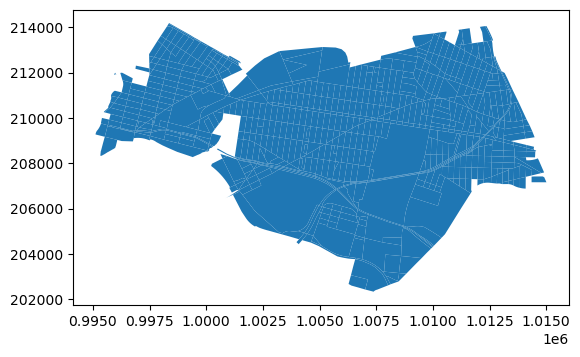

In [143]:
# Plotting the community district spatial data
cd_402.plot()

In [144]:
# Merging the CD402 GeodataFrame data with the WAC industry dataframe.
cd_402_wac = pd.merge(cd_402, df_industry, how="left", on='GEOID')

In [145]:
# Checking first row
cd_402_wac.head(1)

,CB2020,BoroCode,BoroName,CT2020,BCTCB2020,GEOID,geometry,index_right,BoroCD,C000,...,CNS11,CNS12,CNS13,CNS14,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20
0,1000,4,Queens,000101,40001011000,360810001011000,"POLYGON ((996320.602 210040.171, 996257.098 20...",23.0,402.0,227.0,...,3.0,6.0,0.0,14.0,2.0,33.0,0.0,39.0,96.0,0.0


In [146]:
# Calculating the sum of each column ‘CNS01’ to ‘CNS20’ in the dataframe ‘cd_402_wac’ using the .sum() function
# Storing the results in a new dataframe called ‘cd_402_wac_totals’ 
# Creating two columns: ‘WAC Code’ (the index) and ‘WAC Total’ (sums)

cd_402_wac_totals = cd_402_wac[['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08',
                                'CNS09','CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16',
                                'CNS17','CNS18','CNS19','CNS20']].sum()

cd_402_wac_totals = pd.DataFrame({
    'WAC Code': cd_402_wac_totals.index,
    'WAC Total': cd_402_wac_totals.values})

In [147]:
# Creating three new columns in the 'cd_402_wac_totals' dataframe: 'NAICS Code', 'NAICS Title', and 'DCP Macro Sector'.
# Using the map function to assign the values from the dictionary to the new columns where the reference column matches the key.
# The lambda function checks if the key exists in the dictionary. If it does, it returns the corresponding 1st, 2nd, and 3rd value; if not, it returns None.

cd_402_wac_totals['NAICS Code'] = cd_402_wac_totals['WAC Code'].map(lambda x: wac_to_naics_dcp_code.get(x)[0] if wac_to_naics_dcp_code.get(x) is not None else None)
cd_402_wac_totals['NAICS Title'] = cd_402_wac_totals['WAC Code'].map(lambda x: wac_to_naics_dcp_code.get(x)[1] if wac_to_naics_dcp_code.get(x) is not None else None)
cd_402_wac_totals['DCP Macro Sector'] = cd_402_wac_totals['WAC Code'].map(lambda x: wac_to_naics_dcp_code.get(x)[2] if wac_to_naics_dcp_code.get(x) is not None else None)

In [148]:
# Checking that the transformations worked properly
cd_402_wac_totals

,WAC Code,WAC Total,NAICS Code,NAICS Title,DCP Macro Sector
0,CNS01,6.0,11,"Agriculture, Forestry, Fishing and Hunting",Industrial
1,CNS02,0.0,21,"Mining, Quarrying, and Oil and Gas Extraction",Industrial
2,CNS03,13.0,22,Utilities,Industrial
3,CNS04,13187.0,23,Construction,Industrial
4,CNS05,4476.0,31-33,Manufacturing,Industrial
5,CNS06,4738.0,42,Wholesale Trade,Industrial
6,CNS07,6874.0,44-45,Retail Trade,Local Services
7,CNS08,5490.0,48-49,Transportation and Warehousing,Industrial
8,CNS09,1334.0,51,Information,Office
9,CNS10,2871.0,52,Finance and Insurance,Office


In [149]:
# Saving the file as a csv
cd_402_wac_totals.to_csv('cd_402_wac_totals.csv', index=False)

In [150]:
# Sorting values in descending order
cd_402_wac_totals = cd_402_wac_totals.sort_values('WAC Code', ascending=False)

In [200]:
# Creating a horizontal bar chart using Plotly

fig = px.bar(cd_402_wac_totals, x="WAC Total", y="NAICS Title", color="DCP Macro Sector", orientation='h', 
             height=500, title='Total Jobs per NAICS Industry')
fig.update_layout(legend_traceorder="reversed")
fig.update_layout(
    {
        "paper_bgcolor": "rgba(0, 0, 0, 0)",
        "plot_bgcolor": "rgba(0, 0, 0, 0)",
    }
)
fig.update_layout(title_text='Total Jobs per NAICS Title in CD402', title_x=0.5)
fig.show()

In [227]:
# Creating a pie chart for NAICS Title

fig = px.pie(cd_402_wac_totals, values='WAC Total', names='NAICS Title', title='Industry in CD 402', height=800)
fig.update_traces(direction="clockwise")
fig.update_layout(
    {
        "paper_bgcolor": "rgba(0, 0, 0, 0)",
        "plot_bgcolor": "rgba(0, 0, 0, 0)",
    })
fig.update_layout(title_text='Industry in CD 402 by NAICS Title', title_x=0.5)
fig.update_layout(uniformtext_minsize=20, uniformtext_mode='hide')
fig.update_layout(legend=dict(title_font_family="Times New Roman", font=dict(size= 14)))
fig.update_layout(legend=dict(y=0.5))
fig.show()

In [242]:
# Creating a pie chart DCP Macro Sector

fig = px.pie(cd_402_wac_totals, values='WAC Total', names='DCP Macro Sector', height=500)
fig.update_traces(direction="clockwise")
fig.update_layout(
    {
        "paper_bgcolor": "rgba(0, 0, 0, 0)",
        "plot_bgcolor": "rgba(0, 0, 0, 0)",
    })
fig.update_layout(title_text='Industry in CD 402 by DCP Macro Sector', title_x=0.43)
fig.update_layout(uniformtext_minsize=20, uniformtext_mode='hide')
fig.update_layout(legend=dict(title_font_family="Times New Roman", font=dict(size= 20)))
fig.update_layout(legend=dict(y=0.5))
fig.show()

In [244]:
# Creating a sunburst chart for DCP Macro Sector and NAICS Title

fig = px.sunburst(cd_402_wac_totals, path=['DCP Macro Sector', 'NAICS Title'], values='WAC Total',
                  color='DCP Macro Sector', height=600)
fig.update_layout(
    {
        "paper_bgcolor": "rgba(0, 0, 0, 0)",
        "plot_bgcolor": "rgba(0, 0, 0, 0)",
    })
fig.update_layout(title_text='DCP Macro Sector and NAICS Title', title_x=0.5)
fig.update_layout(uniformtext_minsize=20)
fig.show()

In [193]:
# Creating a treemap of DCP Macro Sector and NAICS Title

fig = px.treemap(cd_402_wac_totals, path=['DCP Macro Sector', 'NAICS Title'], values='WAC Total',
                  color='DCP Macro Sector', title='DCP Macro Sector by NAICS Industry', height=600)
fig.update_layout(uniformtext_minsize=20)
fig.update_layout(
    {
        "paper_bgcolor": "rgba(0, 0, 0, 0)",
        "plot_bgcolor": "rgba(0, 0, 0, 0)",
    })
fig.show()

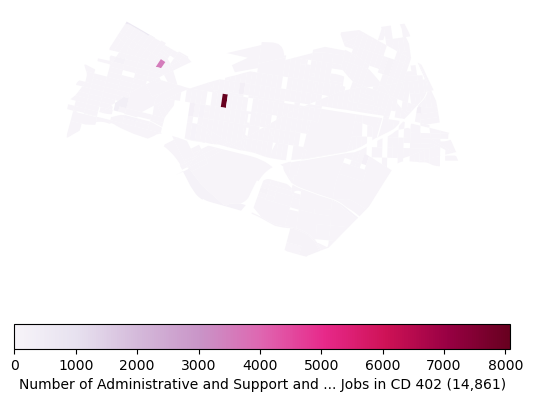

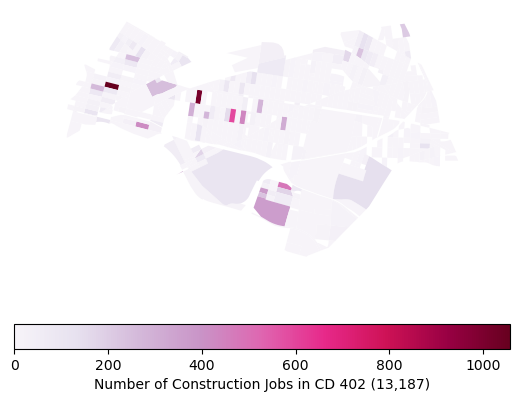

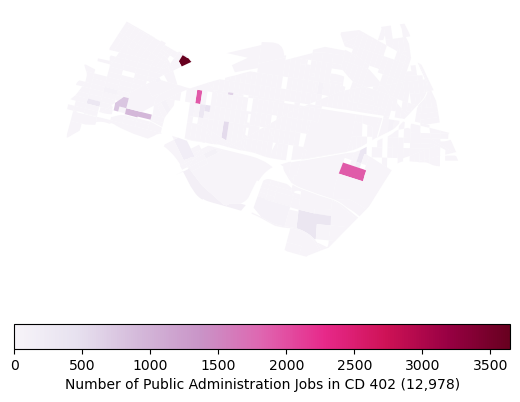

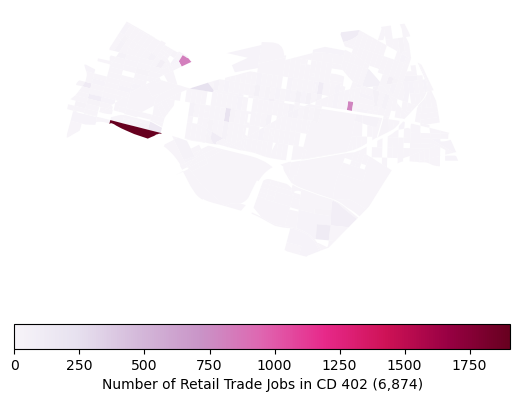

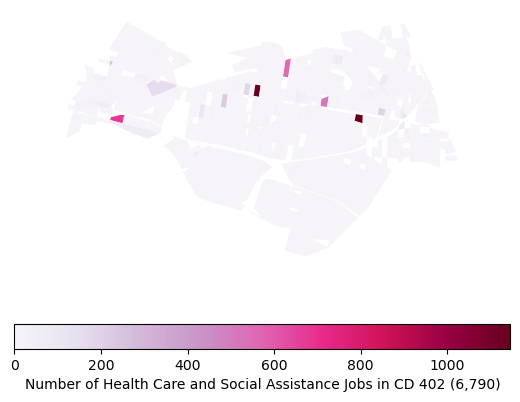

In [238]:
# Creating choropleth maps of CD402 by the top five industries: Administrative Support, Construction, Public Administration, Retail Trade, and Health Care

ax = cd_402_wac.plot(column = 'CNS14', 
                     legend = True, 
                     cmap = 'PuRd',
                     legend_kwds={"label": "Number of Administrative and Support and ... Jobs in CD 402 (14,861)", "orientation": "horizontal"},)
ax.set_axis_off();

ax = cd_402_wac.plot(column = 'CNS04', 
                     legend = True, 
                     cmap = 'PuRd',
                     legend_kwds={"label": "Number of Construction Jobs in CD 402 (13,187)", "orientation": "horizontal"},)
ax.set_axis_off();

ax = cd_402_wac.plot(column = 'CNS20', 
                     legend = True, 
                     cmap = 'PuRd',
                     legend_kwds={"label": "Number of Public Administration Jobs in CD 402 (12,978)", "orientation": "horizontal"},)
ax.set_axis_off();

ax = cd_402_wac.plot(column = 'CNS07', 
                     legend = True, 
                     cmap = 'PuRd',
                     legend_kwds={"label": "Number of Retail Trade Jobs in CD 402 (6,874)", "orientation": "horizontal"},)
ax.set_axis_off();

ax = cd_402_wac.plot(column = 'CNS16', 
                     legend = True, 
                     cmap = 'PuRd',
                     legend_kwds={"label": "Number of Health Care and Social Assistance Jobs in CD 402 (6,790)", "orientation": "horizontal"},)
ax.set_axis_off();

In [156]:
# Exploring additional insights from the original WAC dataframe
# Merging the CD402 GeodataFrame data with the total WAC dataframe.
cd_402_all = pd.merge(cd_402, df_total, how="left", on='GEOID')

In [157]:
# Same process as before: Calculating the sum of each column in the dataframe ‘cd_402_all’ using the .sum() function
# Storing the results in a new dataframe called ‘cd_402_wac_totals_full_dataset’ 
# Creating two columns: ‘WAC Code’ (the index) and ‘WAC Total’ (the sums)

cd_402_wac_totals_full_dataset = cd_402_all[['C000','CA01','CA02','CA03','CE01','CE02','CE03',
                                             'CNS01','CNS02','CNS03','CNS04','CNS05','CNS06',
                                             'CNS07','CNS08','CNS09','CNS10','CNS11','CNS12',
                                             'CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                             'CNS19','CNS20','CR01','CR02','CR03','CR04','CR05',
                                             'CR07','CT01','CT02','CD01','CD02','CD03','CD04',
                                             'CS01','CS02','CFA01','CFA02','CFA03','CFA04','CFA05',
                                             'CFS01','CFS02','CFS03','CFS04','CFS05']].sum()

cd_402_wac_totals_full_dataset = pd.DataFrame({
    'WAC Code': cd_402_wac_totals_full_dataset.index,
    'WAC Total': cd_402_wac_totals_full_dataset.values})

In [158]:
# Creating a similar dictionary as before, but for WAC code explanation

wac_title_dict = {'C000':'Total number of jobs',
                         'CA01':'Number of jobs for workers age 29 or younger',
                         'CA02':'Number of jobs for workers age 30 to 54',
                         'CA03':'Number of jobs for workers age 55 or older',
                         'CE01':'Number of jobs with earnings $1250/month or less',
                         'CE02':'Number of jobs with earnings $1251/month to $3333/month',
                         'CE03':'Number of jobs with earnings greater than $3333/month',
                         'CNS01':'Number of jobs in NAICS sector 11 (Agriculture, Forestry, Fishing and Hunting)',
                         'CNS02':'Number of jobs in NAICS sector 21 (Mining, Quarrying, and Oil and Gas Extraction)',
                         'CNS03':'Number of jobs in NAICS sector 22 (Utilities)',
                         'CNS04':'Number of jobs in NAICS sector 23 (Construction)',
                         'CNS05':'Number of jobs in NAICS sector 31-33 (Manufacturing)',
                         'CNS06':'Number of jobs in NAICS sector 42 (Wholesale Trade)',
                         'CNS07':'Number of jobs in NAICS sector 44-45 (Retail Trade)',
                         'CNS08':'Number of jobs in NAICS sector 48-49 (Transportation and Warehousing)',
                         'CNS09':'Number of jobs in NAICS sector 51 (Information)',
                         'CNS10':'Number of jobs in NAICS sector 52 (Finance and Insurance)',
                         'CNS11':'Number of jobs in NAICS sector 53 (Real Estate and Rental and Leasing)',
                         'CNS12':'Number of jobs in NAICS sector 54 (Professional, Scientific, and Technical Services)',
                         'CNS13':'Number of jobs in NAICS sector 55 (Management of Companies and Enterprises)',
                         'CNS14':'Number of jobs in NAICS sector 56 (Administrative and Support and Waste Management and Remediation Services)',
                         'CNS15':'Number of jobs in NAICS sector 61 (Educational Services)',
                         'CNS16':'Number of jobs in NAICS sector 62 (Health Care and Social Assistance)',
                         'CNS17':'Number of jobs in NAICS sector 71 (Arts, Entertainment, and Recreation)',
                         'CNS18':'Number of jobs in NAICS sector 72 (Accommodation and Food Services)',
                         'CNS19':'Number of jobs in NAICS sector 81 (Other Services [except Public Administration])',
                         'CNS20':'Number of jobs in NAICS sector 92 (Public Administration)',
                         'CR01':'Number of jobs for workers with Race: White, Alone',
                         'CR02':'Number of jobs for workers with Race: Black or African American Alone',
                         'CR03':'Number of jobs for workers with Race: American Indian or Alaska Native Alone',
                         'CR04':'Number of jobs for workers with Race: Asian Alone',
                         'CR05':'Number of jobs for workers with Race: Native Hawaiian or Other Pacific Islander Alone',
                         'CR07':'Number of jobs for workers with Race: Two or More Race Groups',
                         'CT01':'Number of jobs for workers with Ethnicity: Not Hispanic or Latino',
                         'CT02':'Number of jobs for workers with Ethnicity: Hispanic or Latino',
                         'CD01':'Number of jobs for workers with Educational Attainment: Less than high school',
                         'CD02':'Number of jobs for workers with Educational Attainment: High school or equivalent, no college',
                         'CD03':'Number of jobs for workers with Educational Attainment: Some college or Associate degree',
                         'CD04':'Number of jobs for workers with Educational Attainment: Bachelors degree or advanced degree1',
                         'CS01':'Number of jobs for workers with Sex: Male',
                         'CS02':'Number of jobs for workers with Sex: Female',
                         'CFA01':'Number of jobs for workers at firms with Firm Age: 0-1 Years',
                         'CFA02':'Number of jobs for workers at firms with Firm Age: 2-3 Years',
                         'CFA03':'Number of jobs for workers at firms with Firm Age: 4-5 Years',
                         'CFA04':'Number of jobs for workers at firms with Firm Age: 6-10 Years1',
                         'CFA05':'Number of jobs for workers at firms with Firm Age: 11+ Years',
                         'CFS01':'Number of jobs for workers at firms with Firm Size: 0-19 Employees',
                         'CFS02':'Number of jobs for workers at firms with Firm Size: 20-49 Employees',
                         'CFS03':'Number of jobs for workers at firms with Firm Size: 50-249 Employees',
                         'CFS04':'Number of jobs for workers at firms with Firm Size: 250-499 Employees',
                         'CFS05':'Number of jobs for workers at firms with Firm Size: 500+ Employees'
                         }

In [164]:
# Creating a new column in the 'cd_402_wac_totals_full_dataset' dataframe: 'WAC Title'.
# Using the map function to assign the values from the dictionary to the new columns where the reference column matches the key.
# The lambda function checks if the key exists in the dictionary. If it does, it returns the corresponding 1st value; if not, it returns None.

cd_402_wac_totals_full_dataset['WAC Title'] = cd_402_wac_totals_full_dataset['WAC Code'].map(lambda x: wac_title_dict.get(x) if wac_title_dict.get(x) is not None else None)

In [253]:
cd_402_wac_totals_full_dataset

,WAC Code,WAC Total,WAC Title
50,CFS05,0.0,Number of jobs for workers at firms with Firm ...
48,CFS03,0.0,Number of jobs for workers at firms with Firm ...
47,CFS02,0.0,Number of jobs for workers at firms with Firm ...
46,CFS01,0.0,Number of jobs for workers at firms with Firm ...
45,CFA05,0.0,Number of jobs for workers at firms with Firm ...
44,CFA04,0.0,Number of jobs for workers at firms with Firm ...
43,CFA03,0.0,Number of jobs for workers at firms with Firm ...
8,CNS02,0.0,"Number of jobs in NAICS sector 21 (Mining, Qua..."
49,CFS04,0.0,Number of jobs for workers at firms with Firm ...
42,CFA02,0.0,Number of jobs for workers at firms with Firm ...


In [251]:
# Sorting values in descending order
cd_402_wac_totals_full_dataset = cd_402_wac_totals_full_dataset.sort_values('WAC Total', ascending=True)

In [249]:
# Creating a horizontal bar chart

fig = px.bar(cd_402_wac_totals_full_dataset, x="WAC Total", y="WAC Title", orientation='h', 
             height=1000)
fig.update_layout(legend_traceorder="reversed")
fig.update_layout(title_text='Total Jobs by WAC Title', title_x=0.5)
fig.update_layout(
    {
        "paper_bgcolor": "rgba(0, 0, 0, 0)",
        "plot_bgcolor": "rgba(0, 0, 0, 0)",
    }
)
fig.show()

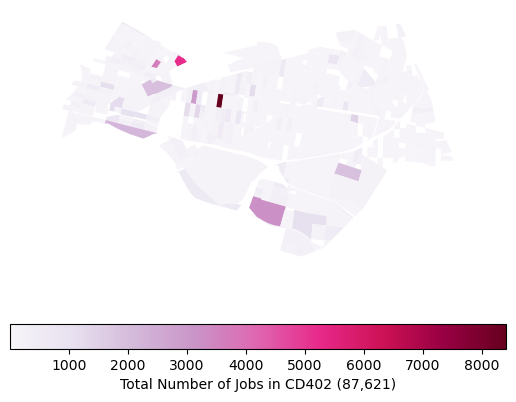

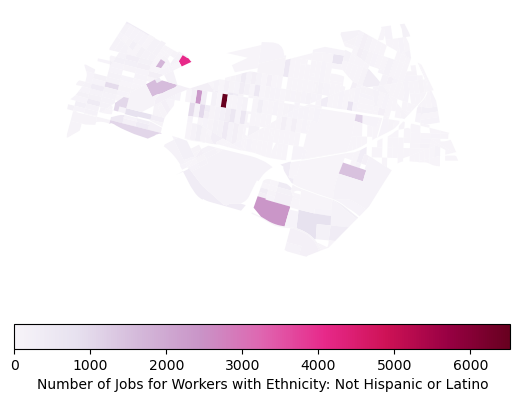

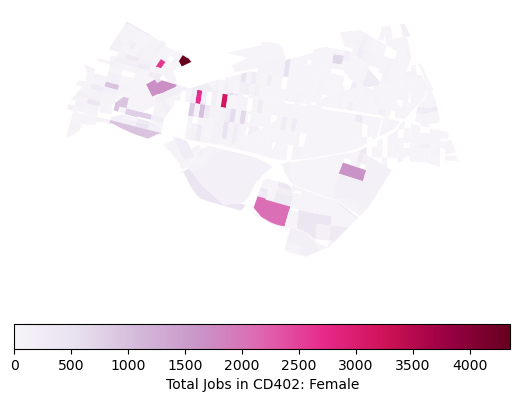

In [257]:
# Creating choropleth maps for a few different metrics

ax_1 = cd_402_all.plot(column = 'C000', 
                       legend = True, 
                       cmap = 'PuRd',
                       legend_kwds={"label": "Total Number of Jobs in CD402 (87,621)", "orientation": "horizontal"},)
ax_1.set_axis_off();

ax_1 = cd_402_all.plot(column = 'CT01', 
                       legend = True, 
                       cmap = 'PuRd',
                       legend_kwds={"label": "Number of Jobs for Workers with Ethnicity: Not Hispanic or Latino", "orientation": "horizontal"},)
ax_1.set_axis_off();

ax_1 = cd_402_all.plot(column = 'CE03', 
                       legend = True, 
                       cmap = 'PuRd',
                       legend_kwds={"label": "Total Jobs in CD402: Female", "orientation": "horizontal"},)
ax_1.set_axis_off();